In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
import warnings

In [4]:
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/diabetes.csv')

In [6]:
df.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


data preprocessing EDA

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


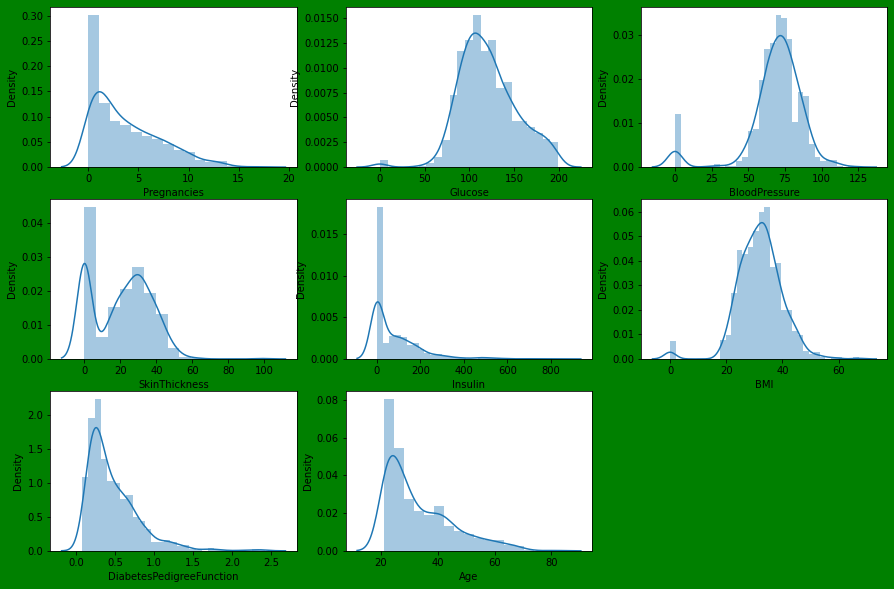

In [12]:
# lets see how is data distributed for every columns
plt.figure(figsize=(15,10),facecolor='green')
p=1
for col in df:
    if p <=8:
        ax = plt.subplot(3,3,p)
        sns.distplot(df[col])
        plt.xlabel=(col)
    p+=1    
plt.show()        

we can see there some skewness in data have some features
we see few column= glucose,insulin,BMI, blood pressure,  does not have possible to 0 value so, we deal with data.feature
we replace the zero value

In [20]:
# df.describe()

In [8]:
df['BMI'].mean()

31.992578124999998

In [9]:
# replacing zeroes value
# df['BMI']=df['BMI'].replace(0,df['BMI'].mean()) # same things lower side
df['BMI'] = df['BMI'].replace(0,32)

In [10]:
df['BloodPressure'].mean()
df['Glucose'].mean()
df['Insulin'].mean()
df['SkinThickness'].mean()

20.536458333333332

In [11]:
df['BloodPressure'] = df['BloodPressure'].replace(0,69)
df['Glucose'] = df['Glucose'].replace(0,120)
df['Insulin'] = df['Insulin'].replace(0,78)
df['SkinThickness'] = df['SkinThickness'].replace(0,19)


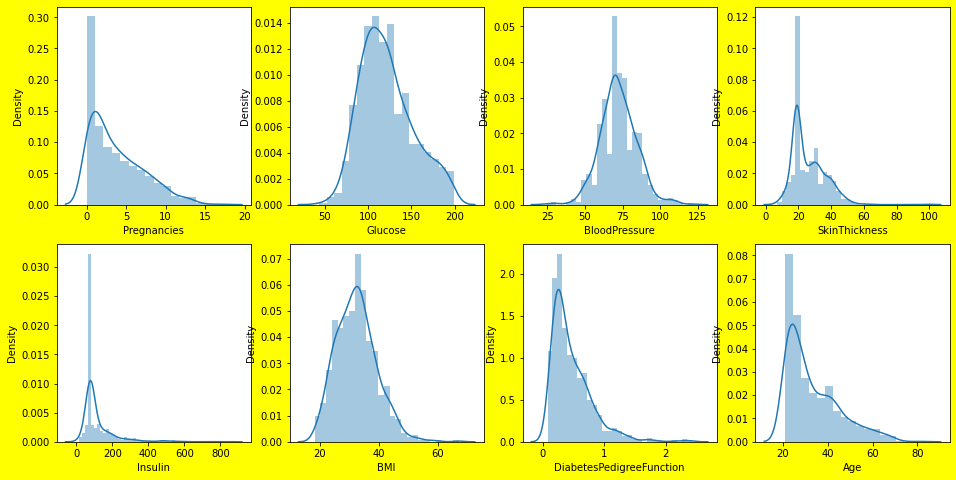

In [15]:
# 2nd time
# lets see how is data distributed for every columns
plt.figure(figsize=(15,10),facecolor='yello')
p=1
for col in df:
    if p <=8:
        ax = plt.subplot(3,3,p)
        sns.distplot(df[col])
        plt.xlabel=(col)
    p+=1    
plt.show()        

In [16]:
# df_feature=df.columns

now we have deal with 0 value then distribution look some better but some outliers having
deal with outliers

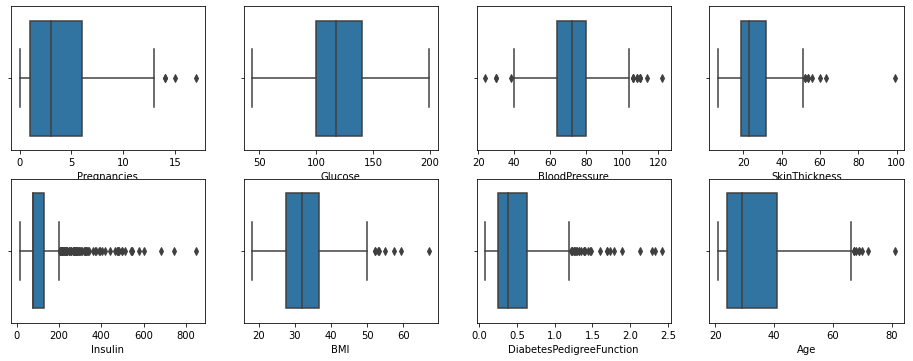

In [18]:
# lets see how is data distributed for every columns
# visualize the all outliers
plt.figure(figsize=(16,9),)
p=1
for colum in df:
    if p <=8:
        ax = plt.subplot(3,4,p)
        sns.boxplot(df[colum])
        plt.xlabel=(colum)
    p+=1    
plt.show()        

In [21]:
# IQR find
# 1st quantile
q1=df.quantile(0.25)

# 3rd quantile
q3=df.quantile(0.75)

# IQR
iqr=q3-q1

Outliers Detection
higher= q3+(1.5*iqr)
lower= q1-(1.5*iqr)

In [22]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [102]:
df.shape

(768, 9)

In [103]:
ind=np.where(df['Pregnancies']>12)

In [104]:
df1=df.drop(df.index[ind])

In [105]:
ind1=np.where(df1['BMI'] >= 50)

In [106]:
df2=df1.drop(df1.index[ind1])

In [107]:
df2.shape

(745, 9)

In [53]:
# dataframe index properly

In [115]:
id3=np.where(df2['BloodPressure'] >= 105) 


In [116]:
df3=df2.drop(df2.index[id3])

In [118]:
df3.shape

(737, 9)

In [124]:
id4=np.where(df3['BloodPressure'] < 40)
id4

(array([ 18, 573, 575], dtype=int64),)

In [125]:
df4=df3.drop(df3.index[id4])

In [127]:
df4.shape

(734, 9)

<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

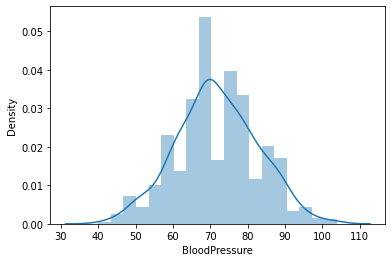

In [128]:
sns.distplot(df4['BloodPressure'])

In [58]:
high=q3.SkinThickness + (1.5*iqr.SkinThickness)
high

51.5

In [59]:
i4=np.where(df4['SkinThickness'] > 52)

In [129]:
df5=df4.drop(df4.index[i4])

In [130]:
df5.shape

(728, 9)

In [77]:
high=q3.Insulin+(1.5*iqr.Insulin)
high

201.125

In [150]:
i5=np.where(df5['Insulin']>200)

In [151]:
df6=df5.drop(df5.index[i5])

In [152]:
df6.shape

(648, 9)

In [153]:
h=q3.DiabetesPedigreeFunction +(1.5 * iqr.DiabetesPedigreeFunction)
h

1.2

In [154]:
i6=np.where(df6['DiabetesPedigreeFunction'] >= h)

In [155]:
df7=df6.drop(df6.index[i6])

In [156]:
df7.shape

(625, 9)

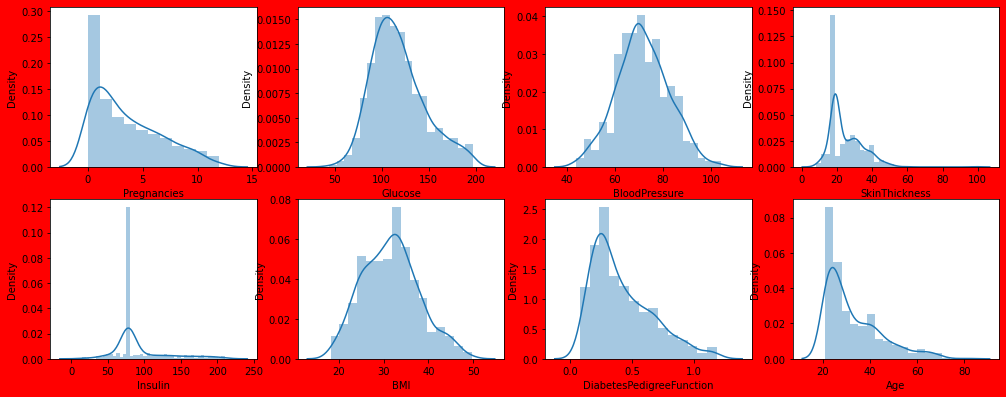

In [157]:
# last time visualize to see how the data look better yes or no
plt.figure(figsize=(17,10),facecolor='r')
p=1
for col in df7:
    if p <=8:
        ax = plt.subplot(3,4,p)
        sns.distplot(d7[col])
        plt.xlabel=(col)
    p+=1    
plt.show()        

In [164]:
df7.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,78,33.6,0.627,50,1
1,1,85,66,29,78,26.6,0.351,31,0
2,8,183,64,19,78,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [170]:
x=df7.iloc[:,0:-1]

In [172]:
y=df7['Outcome']

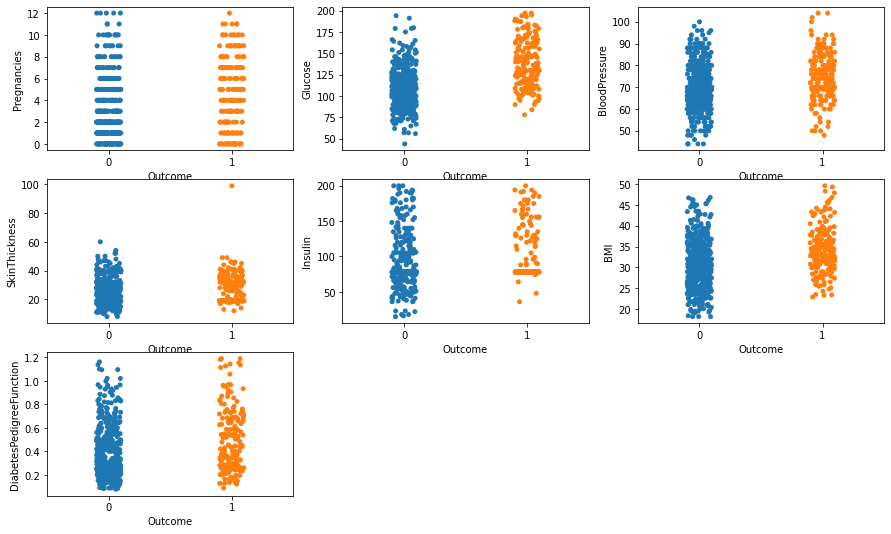

In [178]:
plt.figure(figsize=(15,9))
p=1
for col in df7:
    if p<=7:
        ax=plt.subplot(3,3,p)
        sns.stripplot(y,x[col])
    p+=1
plt.show()

In [179]:
xscale=StandardScaler()

In [180]:
scaled=xscale.fit_transform(x)

In [181]:
xtrain,xtest,ytrain,ytest=train_test_split(scaled,y,test_size=0.25 , random_state=49)

In [182]:
lr=LogisticRegression()

In [183]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [184]:
y_pred=lr.predict(xtest)

In [188]:
accuracy=accuracy_score(ytest,y_pred)

In [189]:
accuracy

0.8407643312101911

In [199]:
confusion_matrix(ytest,y_pred)

array([[102,   9],
       [ 16,  30]], dtype=int64)

In [200]:
from sklearn.metrics import classification_report as cr

In [201]:
print(cr(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       111
           1       0.77      0.65      0.71        46

    accuracy                           0.84       157
   macro avg       0.82      0.79      0.80       157
weighted avg       0.84      0.84      0.84       157



In [202]:
# 16 ROC AUC CURVE
fpr,tpr,threshold= roc_curve(ytest,y_pred)

In [204]:
print('False_positive_rate', fpr)
print('True_positive_rate', tpr)
print('Threshold', threshold)

False_positive_rate [0.         0.08108108 1.        ]
True_positive_rate [0.         0.65217391 1.        ]
Threshold [2 1 0]


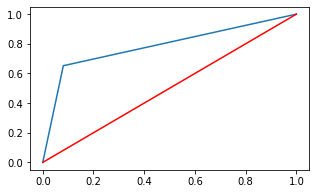

In [216]:
plt.figure(figsize=(5,3))
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r')

In [218]:
print(roc_auc_score(ytest,y_pred))

0.7855464159811986
